In [69]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
# loading data as a DataFrame
df_survey_schema = pd.read_csv('survey_results_schema.csv')
df_answers = pd.read_csv('survey_results_public.csv',
                         usecols = ['Respondent', 'Hobbyist', 'YearsCode', 'YearsCodePro', 'Age','Student', 'MainBranch'],
                         index_col = ['Respondent'])
pd.options.display.max_columns = None
df_answers.head()

,MainBranch,Hobbyist,Student,YearsCode,YearsCodePro,Age
Respondent,,,,,,
1,I am a student who is learning to code,Yes,No,4,NaN,14.0
2,I am a student who is learning to code,No,"Yes, full-time",NaN,NaN,19.0
3,"I am not primarily a developer, but I write co...",Yes,No,3,1,28.0
4,I am a developer by profession,No,No,3,Less than 1 year,22.0
5,I am a developer by profession,Yes,No,16,9,30.0


In [70]:
df_answers.shape

(88883, 6)

In [71]:
# change text value to number
df_answers.YearsCode.replace(to_replace={'Less than 1 year': '1',
                                         'More than 50 years': '50'}, inplace=True)
pd.unique(df_answers.YearsCode)

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', '1', '30', '9', '26', '40', '19', '15', '20',
       '28', '25', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37', '29', '44',
       '45', '48', '46', '43', '47', '49'], dtype=object)

In [72]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

In [73]:
df_answers.YearsCodePro.replace(to_replace={'Less than 1 year': '1',
                                            'More than 50 years': '50'}, inplace=True)

In [74]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', '9', '3', '4', '10', '8', '2', '13', '18', '5', '14',
       '22', '23', '19', '35', '20', '25', '7', '15', '27', '6', '48',
       '12', '31', '11', '17', '16', '21', '29', '30', '26', '33', '28',
       '37', '40', '34', '24', '39', '38', '36', '32', '41', '45', '43',
       '50', '44', '42', '46', '49', '47'], dtype=object)

In [75]:
pd.unique(df_answers.Hobbyist)

array(['Yes', 'No'], dtype=object)

In [77]:

df_answers.Hobbyist.replace(to_replace={'Yes': '1',
                                        'No': '0'}, inplace=True)

In [78]:
pd.unique(df_answers.Student)

array(['No', 'Yes, full-time', nan, 'Yes, part-time'], dtype=object)

In [79]:
df_answers.Student.replace(to_replace={'Yes, full-time': '1',
                                       'Yes, part-time': '1',
                                       'No': '0'}, inplace=True)
pd.unique(df_answers.Student)

array(['0', '1', nan], dtype=object)

In [80]:
df_answers.dtypes

MainBranch       object
Hobbyist         object
Student          object
YearsCode        object
YearsCodePro     object
Age             float64
dtype: object

In [81]:
df_answers.head()

,MainBranch,Hobbyist,Student,YearsCode,YearsCodePro,Age
Respondent,,,,,,
1,I am a student who is learning to code,1,0,4,NaN,14.0
2,I am a student who is learning to code,0,1,NaN,NaN,19.0
3,"I am not primarily a developer, but I write co...",1,0,3,1,28.0
4,I am a developer by profession,0,0,3,1,22.0
5,I am a developer by profession,1,0,16,9,30.0


In [82]:
# convert to float64
df_answers[['Student', 'Hobbyist', 'YearsCode', 'YearsCodePro', 'Age']] = df_answers[['Student', 'Hobbyist', 'YearsCode', 'YearsCodePro', 'Age']].astype('float64', copy=False)

In [83]:
df_base = df_answers[['YearsCode', 'YearsCodePro', 'Age']]


In [84]:
# checking correlation
df_base.corr()

,YearsCode,YearsCodePro,Age
YearsCode,1.000000,0.872745,0.780571
YearsCodePro,0.872745,1.000000,0.818525
Age,0.780571,0.818525,1.000000


In [85]:
df_base_sd = df_base[np.abs(df_base - df_base.mean()) <= 3*df_base.std()]
df_base_sd.isna().sum()

YearsCode        2193
YearsCodePro    15843
Age             10876
dtype: int64

In [86]:
df_base_sd = df_base_sd.dropna()

In [87]:
# checking correlation
df_base_sd.corr()

,YearsCode,YearsCodePro,Age
YearsCode,1.000000,0.851281,0.758228
YearsCodePro,0.851281,1.000000,0.793396
Age,0.758228,0.793396,1.000000


In [88]:
# creating a dataframe with One-Hot Encoding
df_answers_2 = pd.get_dummies(df_answers.MainBranch)
df_answers_2.head(3)

,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am"
Respondent,,,,,
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0


In [89]:
# joining two dataframes
df_base = pd.merge(df_base, df_answers_2, on='Respondent', how='inner')
df_base.shape

(88883, 8)

In [90]:
df_base.head()


,YearsCode,YearsCodePro,Age,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am"
Respondent,,,,,,,,
1,4.0,NaN,14.0,0,1,0,0,0
2,NaN,NaN,19.0,0,1,0,0,0
3,3.0,1.0,28.0,0,0,1,0,0
4,3.0,1.0,22.0,1,0,0,0,0
5,16.0,9.0,30.0,1,0,0,0,0


In [91]:
# Add a column 'Student'
df_base= pd.merge(df_base, df_answers[['Student']], on='Respondent', how='inner')
df_base.shape

(88883, 9)

In [92]:
df_base.corr()

,YearsCode,YearsCodePro,Age,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am",Student
YearsCode,1.000000,0.872745,0.780571,0.192834,-0.296229,0.055791,-0.098020,0.106147,-0.295142
YearsCodePro,0.872745,1.000000,0.818525,-0.027607,NaN,-0.004978,NaN,0.084357,-0.191453
Age,0.780571,0.818525,1.000000,0.162522,-0.325084,0.118292,-0.098302,0.118327,-0.327793
I am a developer by profession,0.192834,-0.027607,0.162522,1.000000,-0.605378,-0.512184,-0.332440,-0.226623,-0.316971
I am a student who is learning to code,-0.296229,NaN,-0.325084,-0.605378,1.000000,-0.109544,-0.071101,-0.048469,0.442503
"I am not primarily a developer, but I write code sometimes as part of my work",0.055791,-0.004978,0.118292,-0.512184,-0.109544,1.000000,-0.060155,-0.041008,-0.012505
I code primarily as a hobby,-0.098020,NaN,-0.098302,-0.332440,-0.071101,-0.060155,1.000000,-0.026617,0.019787
"I used to be a developer by profession, but no longer am",0.106147,0.084357,0.118327,-0.226623,-0.048469,-0.041008,-0.026617,1.000000,-0.020222
Student,-0.295142,-0.191453,-0.327793,-0.316971,0.442503,-0.012505,0.019787,-0.020222,1.000000


In [93]:
df_base = df_base.dropna()
df_base.corr()

,YearsCode,YearsCodePro,Age,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am",Student
YearsCode,1.000000,0.874188,0.792287,-0.052973,NaN,0.014975,NaN,0.100823,-0.206222
YearsCodePro,0.874188,1.000000,0.820335,-0.024743,NaN,-0.008742,NaN,0.086828,-0.192122
Age,0.792287,0.820335,1.000000,-0.129840,NaN,0.087647,NaN,0.115606,-0.236412
I am a developer by profession,-0.052973,-0.024743,-0.129840,1.000000,NaN,-0.889689,NaN,-0.379878,-0.050165
I am a student who is learning to code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"I am not primarily a developer, but I write code sometimes as part of my work",0.014975,-0.008742,0.087647,-0.889689,NaN,1.000000,NaN,-0.045802,0.051198
I code primarily as a hobby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"I used to be a developer by profession, but no longer am",0.100823,0.086828,0.115606,-0.379878,NaN,-0.045802,NaN,1.000000,-0.003899
Student,-0.206222,-0.192122,-0.236412,-0.050165,NaN,0.051198,NaN,-0.003899,1.000000


In [94]:
df_base.describe()

,YearsCode,YearsCodePro,Age,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I write code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, but no longer am",Student
count,66940.000000,66940.000000,66940.000000,66940.000000,66940.0,66940.000000,66940.0,66940.000000,66940.000000
mean,12.924500,8.152853,31.630054,0.880654,0.0,0.096878,0.0,0.019181,0.163744
std,9.064308,7.476924,8.655579,0.324197,0.0,0.295794,0.0,0.137163,0.370046
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,6.000000,3.000000,25.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,10.000000,6.000000,30.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,17.000000,11.000000,36.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
max,50.000000,50.000000,99.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [95]:
df_base = df_base.astype('float64', copy=False)

In [96]:
df_base.dtypes

YearsCode                                                                        float64
YearsCodePro                                                                     float64
Age                                                                              float64
I am a developer by profession                                                   float64
I am a student who is learning to code                                           float64
I am not primarily a developer, but I write code sometimes as part of my work    float64
I code primarily as a hobby                                                      float64
I used to be a developer by profession, but no longer am                         float64
Student                                                                          float64
dtype: object

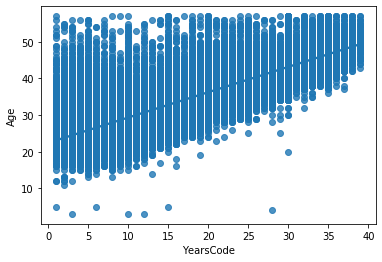

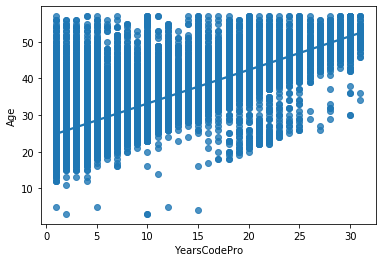

In [97]:
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCode'])
plt.show();
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCodePro'])
plt.show()


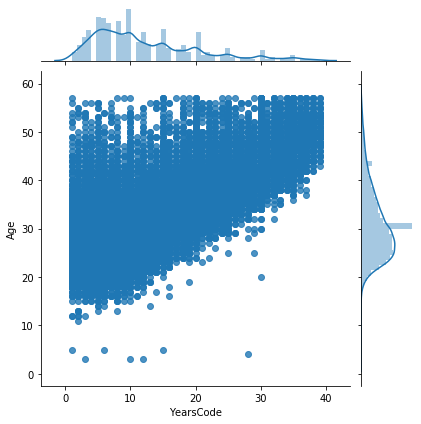

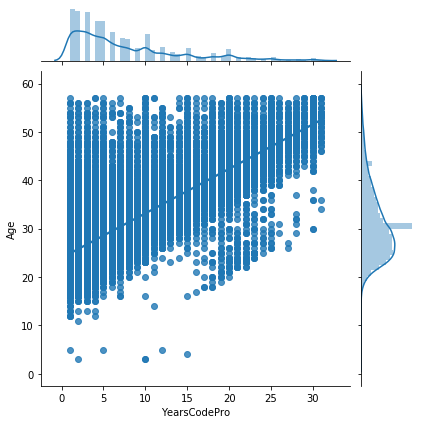

In [98]:
sns.jointplot(y='Age', x='YearsCode', data=df_base_sd, kind='reg')
plt.show();

sns.jointplot(y='Age', x='YearsCodePro', data=df_base_sd, kind='reg')
plt.show();


In [99]:
# creating a regression model
reg_model = linear_model.LinearRegression()
reg_model.fit(df_base[['YearsCodePro', 'YearsCode', 'Student', 'I am a developer by profession',
                         'I am not primarily a developer, but I write code sometimes as part of my work',
                         'I used to be a developer by profession, but no longer am']], df_base['Age']);

In [100]:
# mse calculation
mean_squared_error(df_base['Age'].to_numpy(), 
                   reg_model.predict(df_base[['YearsCodePro', 'YearsCode', 'Student', 'I am a developer by profession',
                         'I am not primarily a developer, but I write code sometimes as part of my work',
                         'I used to be a developer by profession, but no longer am']]),squared=False)


4.6411175220027